<a href="https://colab.research.google.com/github/andalmod/Test/blob/main/Bayes_Fonnesbeck_Downey_Radon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, I am trying to compare PMC3 with Grid Search.
The example is taken from Fonnesbeck, Pydata 2019. It works really well !!!

https://youtu.be/SS_pqgFziAg



I compare this with Grid search from Allen Downey.
Bayesian Statistics Made Simple. Scipy 2019. Great talk

https://youtu.be/-X0BiV9n_fQ


# Fonnesbeck

https://github.com/fonnesbeck/mcmc_pydata_london_2019/blob/master/notebooks/1-Introduction_to_PyMC3.ipynb

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set_context('notebook')
from IPython.core.pylabtools import figsize

import warnings
warnings.filterwarnings("ignore")

In [ ]:
radon = pd.read_csv('radon.csv', index_col=0)
radon.head()

,idnum,state,state2,stfips,zip,region,typebldg,floor,room,basement,windoor,rep,stratum,wave,starttm,stoptm,startdt,stopdt,activity,pcterr,adjwt,dupflag,zipflag,cntyfips,county,fips,Uppm,county_code,log_radon
0,5081.0,MN,MN,27.0,55735,5.0,1.0,1.0,3.0,N,,2,4.0,41,930.0,930.0,12088.0,12288.0,2.2,9.7,1146.499190,1.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
1,5082.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,Y,,5,2.0,40,1615.0,1615.0,11888.0,12088.0,2.2,14.5,471.366223,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
2,5083.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,Y,,3,2.0,42,1030.0,1515.0,20288.0,21188.0,2.9,9.6,433.316718,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,1.098612
3,5084.0,MN,MN,27.0,56469,5.0,1.0,0.0,4.0,Y,,2,2.0,24,1410.0,1410.0,122987.0,123187.0,1.0,24.3,461.623670,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.095310
4,5085.0,MN,MN,27.0,55011,3.0,1.0,0.0,4.0,Y,,3,2.0,40,600.0,600.0,12888.0,13088.0,3.1,13.8,433.316718,0.0,0.0,3.0,ANOKA,27003.0,0.428565,1,1.163151


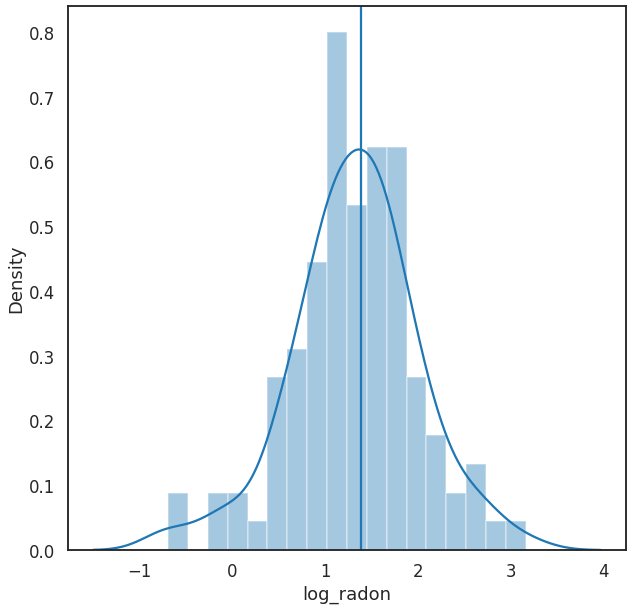

In [ ]:
hennepin_radon = radon.query('county=="HENNEPIN"').log_radon
sns.distplot(hennepin_radon, bins=18)
plt.axvline(np.log(4));

In [ ]:

from pymc3 import Model, Normal, Uniform

with Model() as radon_model:
    
    μ = Normal('μ', mu=0, sd=10)
    σ = Uniform('σ', 0, 10)

In [ ]:
with radon_model:
    
    dist = Normal('dist', mu=μ, sd=σ, observed=hennepin_radon)

In [ ]:
from pymc3 import sample

with radon_model:
    
    samples = sample(1000, tune=1000, cores=2, random_seed=42)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:03<00:00, 1208.23draws/s]


In [ ]:
#Ploteo las distribuciones a posteriori

mu_samples = samples['μ']
sigma_samples = samples['σ']

(array([0.21647299, 0.25976759, 0.77930277, 0.86589197, 1.64519473,
        3.50686246, 4.50263822, 5.71488697, 6.79725193, 7.92291148,
        7.36008171, 7.96620608, 8.09608988, 7.01372492, 5.84477077,
        5.19535179, 4.19957603, 2.77085429, 1.99155152, 1.25554335,
        0.64941897, 0.82259737, 0.25976759, 0.43294598, 0.34635679,
        0.0432946 , 0.0865892 , 0.        , 0.        , 0.0432946 ]),
 array([0.55526708, 0.56681586, 0.57836465, 0.58991343, 0.60146222,
        0.613011  , 0.62455979, 0.63610857, 0.64765736, 0.65920614,
        0.67075493, 0.68230371, 0.6938525 , 0.70540128, 0.71695007,
        0.72849885, 0.74004763, 0.75159642, 0.7631452 , 0.77469399,
        0.78624277, 0.79779156, 0.80934034, 0.82088913, 0.83243791,
        0.8439867 , 0.85553548, 0.86708427, 0.87863305, 0.89018184,
        0.90173062]),
 <a list of 1 Patch objects>)

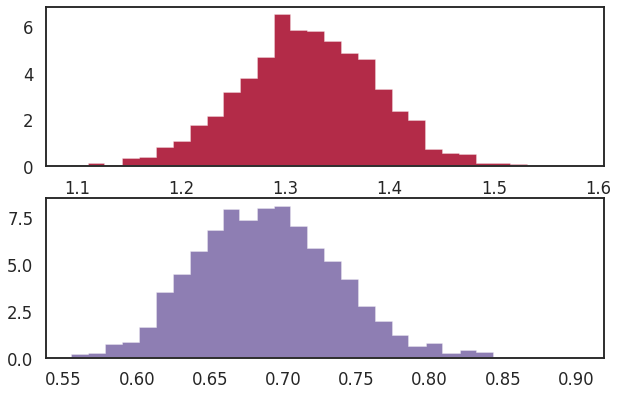

In [ ]:
figsize(10, 10)
#histogram of the samples:

ax = plt.subplot(311)
#ax.set_autoscaley_on(False)

plt.hist(mu_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\Beta$", color="#A60628", density=True)

plt.subplot(312)

plt.hist(sigma_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\Intercept$", color="#7A68A6", density=True)

In [ ]:

from pymc3 import sample_posterior_predictive

with radon_model:
    pp_samples = sample_posterior_predictive(samples, 1000)

100%|██████████| 1000/1000 [00:00<00:00, 1065.37it/s]


In [ ]:
(pp_samples['dist'] > np.log(4)).mean()

0.4633904761904762

# Downey

In [ ]:
# If we're running on Colab, install empiricaldist
# https://pypi.org/project/empiricaldist/

import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install empiricaldist

  Created wheel for empiricaldist: filename=empiricaldist-0.6.0-cp36-none-any.whl size=10357 sha256=940893caeadbb5bfa1a31b246fefd89b838ea0fcaa21792eab594c4646ce4799
  Stored in directory: /root/.cache/pip/wheels/a7/18/38/f4791357371b1d677a885149b397cb1437c0ea88939ab642e7
Successfully built empiricaldist


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('white')
sns.set_context('talk')

import matplotlib.pyplot as plt
from scipy.stats import norm

from empiricaldist import Pmf

I use the same priors as for Fonnesbeck example

In [ ]:
#mu prior

from scipy.stats import norm

mu=0
sig=10

qs = np.linspace(-30,30,1000)
ps = norm(mu,sig).pdf(qs)

In [ ]:
prior_mu = Pmf(ps, index=qs)
prior_mu.normalize()
prior_mu.mean()

4.440892098500626e-16

In [ ]:
#sigma prior

from scipy.stats import uniform

qs = np.linspace(0,10,1000)
ps = uniform(0,10).pdf(qs)

In [ ]:
prior_sig = Pmf(ps, index=qs)
prior_sig.normalize()
prior_sig.mean()

5.0

In [ ]:
def decorate(title):
    """Labels the axes.
    
    title: string
    """
    plt.xlabel('parameter')
    plt.ylabel('PMF')
    plt.title(title)

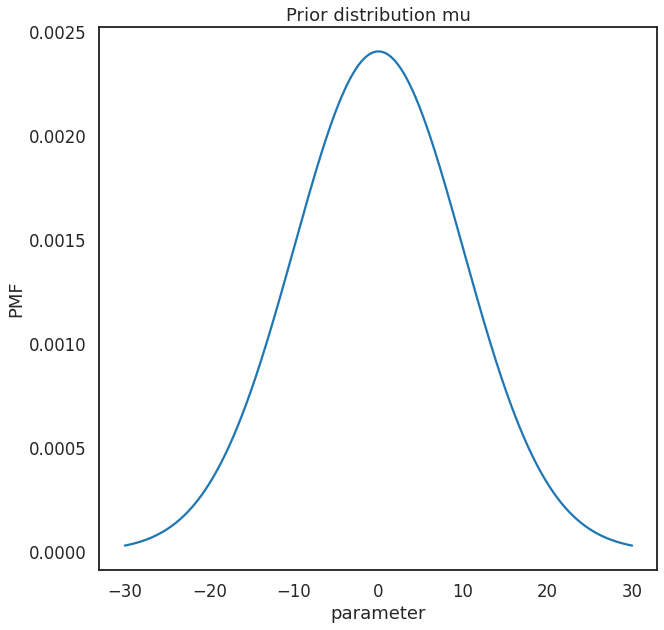

In [ ]:
prior_mu.plot()
decorate('Prior distribution mu')

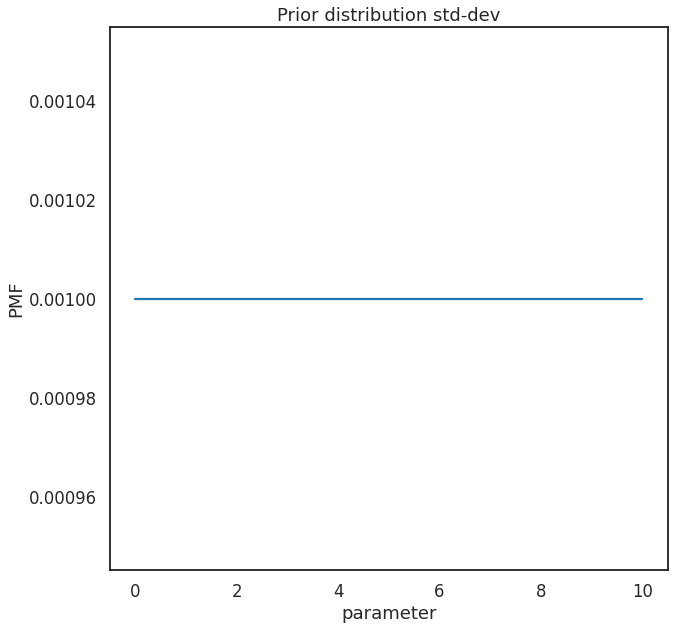

In [ ]:
prior_sig.plot()
decorate('Prior distribution std-dev')

In [ ]:
#likelihood for mu, taking sigma as known

def like_mu(data, hypo):
  #sigma_like is the signa we are taking as known
   
    x = norm.pdf(data,hypo,sigma_like)
    return x

#likelihood for sigma, taking mu as known

def like_sigma(data, hypo):

  #mu_like is the mu we are taking as known
 
    x = norm.pdf(data,mu_like,hypo)
    return x


In [ ]:
# We initialize the posterior distributions as copy of the priors
post_mu = Pmf(prior_mu, copy=True)
post_sig = Pmf(prior_sig, copy=True)


In [ ]:
'''In the following loop, I do the following:
for each i step
- take [i] datapoint from hennepin_radon.
- take sigma_like as mean value of posterior distribution of sigma
- update mu posterior from datapoint and likelihood.
- take [i+1] datapoint from hennepin_radon.
- take mu_like as mean value of posterior distribution of mu
- update sigma posterior from datapoint and likelihood.'''

for i in range(len(hennepin_radon)):
  data=float(hennepin_radon.iloc[i])
  post_sig.dropna(inplace=True)
  sigma_like=post_sig.mean()
  post_mu.update(like_mu,data)
  if (i+1)<len(hennepin_radon):
    data=float(hennepin_radon.iloc[i+1])
    post_mu.dropna(inplace=True)
    mu_like=post_mu.mean()
    post_sig.update(like_sigma,data)






c.i. 0.95: [1.17117117 1.47147147]


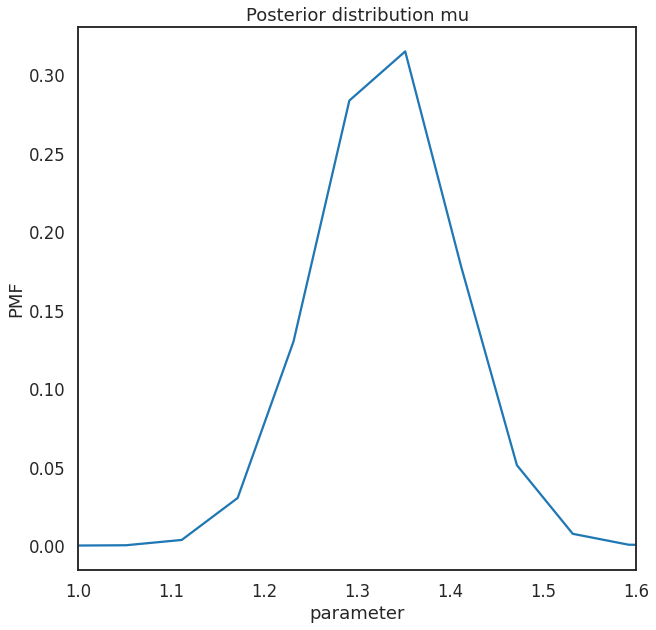

In [ ]:
post_mu.plot(xlim=(1,1.6))
print('c.i. 0.95:',post_mu.credible_interval(0.95))
decorate('Posterior distribution mu')

c.i. 0.95: [0.61061061 0.81081081]


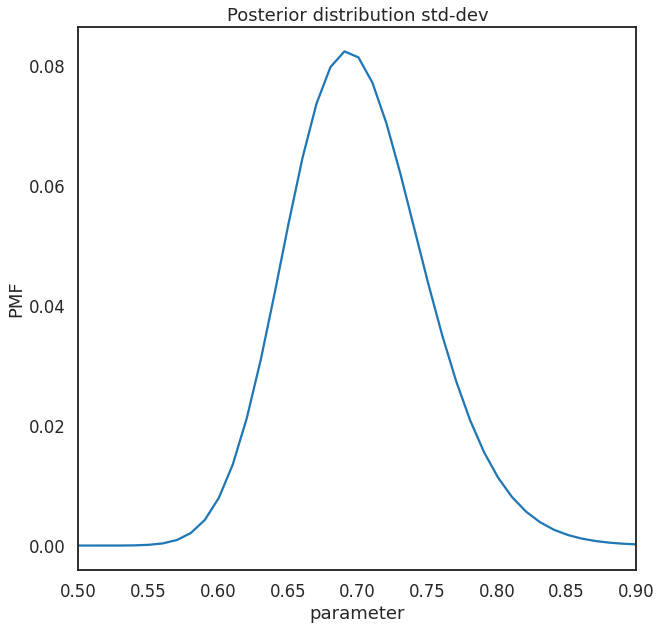

In [ ]:
post_sig.plot(xlim=(0.5,0.9))
print('c.i. 0.95:',post_sig.credible_interval(0.95))
decorate('Posterior distribution std-dev')
